# Exercício Titanic Kaggle
##### Felipe Antonio Brito de Oliveira Aluvino


## Importações Gerais

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## Importações de Pré-Processamento


In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

## Importações Machine Learning

In [3]:
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## Importando os arquivos necessarios

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
#criando um DF que será enviado para o Kaggle
passengerID = test['PassengerId']

#criando um DF com o teste e o treino para tratar os dados mais rapidamente
df_titanic = pd.concat([train, test], ignore_index=True)

In [11]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [12]:
#criando o índice para separar as df de treino e teste posteriormente
train_index = len(train)
test_index = len(df_titanic) - len(test)

In [13]:
df_titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [14]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [15]:
#criando um df que iremos tratar os campos relevantes a partir da base titanic_df
df = pd.DataFrame()

## Tratando as coluna, usnado a 'Survived' como exemplo

In [16]:
# encontrando a quantidade de valores únicos em "Survived"
df_titanic['Survived'].nunique()

2

In [17]:
# encontrando quais são os valores únicos em "Survived"
df_titanic['Survived'].unique()

array([ 0.,  1., nan])

In [18]:
# encontrando a quantidade de valores nulos em "Survived"
df_titanic['Survived'].isnull().sum()

418

In [19]:
# encontrando a quantidade de valores associados a cada variavel de "Survived"
df_titanic['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

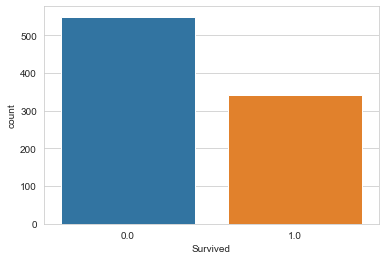

In [20]:
# plotando os valores das colunas
sns.countplot(data = df_titanic, x = 'Survived')

## Função que traz informações sobre a coluna

Quantidade de valores únicos na Survived: 
2

Quais são os valores únicos na Survived: 
[ 0.  1. nan]

Quantidade de valores nulos na Survived: 
418

Quantidade por opção na Survived: 
0.0    549
1.0    342
Name: Survived, dtype: int64


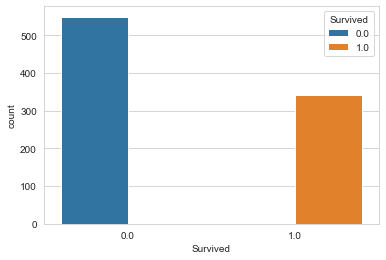

In [21]:
#criando uma função que printa as informações sobre os valores das colunas
def df_info(data, column, count = True):
    print(f'Quantidade de valores únicos na {column}: \n{data[column].nunique()}')
    print(f'\nQuais são os valores únicos na {column}: \n{data[column].unique()}')
    print(f'\nQuantidade de valores nulos na {column}: \n{data[column].isnull().sum()}')
    print(f'\nQuantidade por opção na {column}: \n{data[column].value_counts()}')
    
    if count == True:
        sns.countplot(data = data, x = column, hue = 'Survived')
    else:
        sns.displot(data[column], kde = True)

df_info(df_titanic, 'Survived')

In [22]:
df['Survived'] = df_titanic['Survived']


In [23]:
df

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
1304,NaN
1305,NaN
1306,NaN
1307,NaN


## Tratando PClass

Quantidade de valores únicos na Pclass: 
3

Quais são os valores únicos na Pclass: 
[3 1 2]

Quantidade de valores nulos na Pclass: 
0

Quantidade por opção na Pclass: 
3    709
1    323
2    277
Name: Pclass, dtype: int64


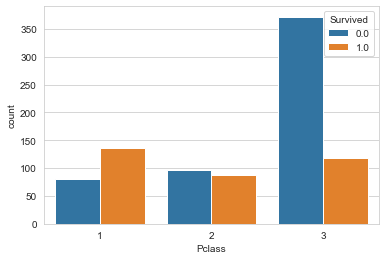

In [24]:
df_info(df_titanic, 'Pclass')

In [25]:
df['Pclass'] = df_titanic['Pclass']
df

,Survived,Pclass
0,0.0,3
1,1.0,1
2,1.0,3
3,1.0,1
4,0.0,3
...,...,...
1304,NaN,3
1305,NaN,1
1306,NaN,3
1307,NaN,3


## Tratando Sex

Quantidade de valores únicos na Sex: 
2

Quais são os valores únicos na Sex: 
['male' 'female']

Quantidade de valores nulos na Sex: 
0

Quantidade por opção na Sex: 
male      843
female    466
Name: Sex, dtype: int64


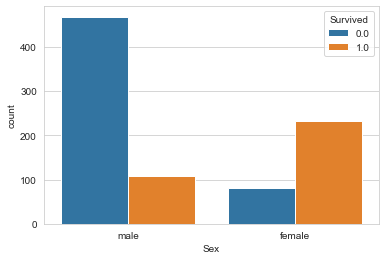

In [26]:
df_info(df_titanic, 'Sex')

In [27]:
df_titanic['Sex'] = df_titanic['Sex'].replace(['male', 'female'], [0, 1])


In [28]:
df['Sex'] = df_titanic['Sex']
df

,Survived,Pclass,Sex
0,0.0,3,0
1,1.0,1,1
2,1.0,3,1
3,1.0,1,1
4,0.0,3,0
...,...,...,...
1304,NaN,3,0
1305,NaN,1,1
1306,NaN,3,0
1307,NaN,3,0


## Tratando o título

Quantidade de valores únicos na Title: 
18

Quais são os valores únicos na Title: 
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']

Quantidade de valores nulos na Title: 
0

Quantidade por opção na Title: 
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64


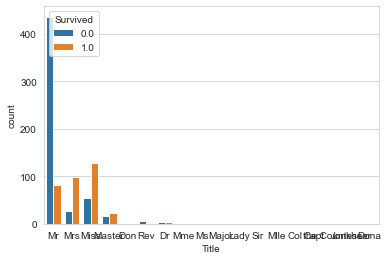

In [29]:
df_titanic['Title'] = df_titanic['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
df_info(df_titanic, 'Title')

In [30]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S,Mr


In [31]:
number_title = dict(df_titanic['Title'].value_counts())
keys_number_title = list(number_title)
keys_number_title


['Mr',
 'Miss',
 'Mrs',
 'Master',
 'Rev',
 'Dr',
 'Col',
 'Mlle',
 'Major',
 'Ms',
 'Lady',
 'Sir',
 'Mme',
 'Don',
 'Capt',
 'the Countess',
 'Jonkheer',
 'Dona']

In [32]:
df_titanic['Title'] = [n if n in keys_number_title[0:4] else 'Person' for n in df_titanic['Title']]  
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,Person
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S,Mr


In [33]:
number_title_actual = dict(df_titanic['Title'].value_counts())
keys_number_title_actual = list(number_title_actual)
keys_number_title_actual

['Mr', 'Miss', 'Mrs', 'Master', 'Person']

In [34]:
df['Title'] = df_titanic['Title']

Quantidade de valores únicos na Title: 
5

Quais são os valores únicos na Title: 
['Mr' 'Mrs' 'Miss' 'Master' 'Person']

Quantidade de valores nulos na Title: 
0

Quantidade por opção na Title: 
Mr        757
Miss      260
Mrs       197
Master     61
Person     34
Name: Title, dtype: int64


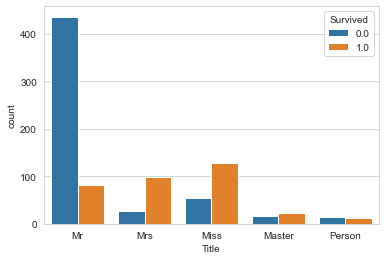

In [35]:
df_info(df, 'Title')

In [36]:
df

,Survived,Pclass,Sex,Title
0,0.0,3,0,Mr
1,1.0,1,1,Mrs
2,1.0,3,1,Miss
3,1.0,1,1,Mrs
4,0.0,3,0,Mr
...,...,...,...,...
1304,NaN,3,0,Mr
1305,NaN,1,1,Person
1306,NaN,3,0,Mr
1307,NaN,3,0,Mr


## Tratar Embarked

Quantidade de valores únicos na Embarked: 
3

Quais são os valores únicos na Embarked: 
['S' 'C' 'Q' nan]

Quantidade de valores nulos na Embarked: 
2

Quantidade por opção na Embarked: 
S    914
C    270
Q    123
Name: Embarked, dtype: int64


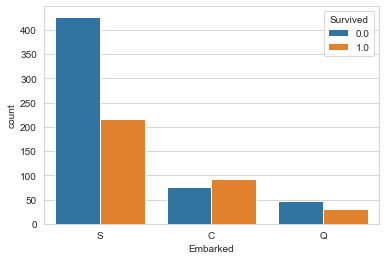

In [37]:
df_info(df_titanic, 'Embarked')

In [38]:
df_titanic.loc[df_titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [39]:
df_titanic.loc[df_titanic['Embarked'] == "C"]['Pclass'].mean()

1.8518518518518519

In [40]:
df_titanic['Embarked'].fillna('C', inplace = True)

In [41]:
df['Embarked'] = df_titanic['Embarked']

df

,Survived,Pclass,Sex,Title,Embarked
0,0.0,3,0,Mr,S
1,1.0,1,1,Mrs,C
2,1.0,3,1,Miss,S
3,1.0,1,1,Mrs,S
4,0.0,3,0,Mr,S
...,...,...,...,...,...
1304,NaN,3,0,Mr,S
1305,NaN,1,1,Person,C
1306,NaN,3,0,Mr,S
1307,NaN,3,0,Mr,S


## Tratar Title, Pclass, Embarked com Getdummies sem dropar first


In [42]:
pclass = pd.get_dummies(df['Pclass'], prefix = "Pclass")
title = pd.get_dummies(df['Title'], prefix = 'Title')
embarked = pd.get_dummies(df['Embarked'], prefix = 'Embarked')

df2 = pd.concat([df, pclass, title, embarked], axis = 1)
df2.drop(['Pclass', 'Title', 'Embarked'], axis=1, inplace=True)


## Tratando idade (parte 1)

Quantidade de valores únicos na Age: 
98

Quais são os valores únicos na Age: 
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]

Quantidade de valores nulos na Age: 
263

Quantidade por opção na Age: 
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: Age, Length: 98, dtype: int64


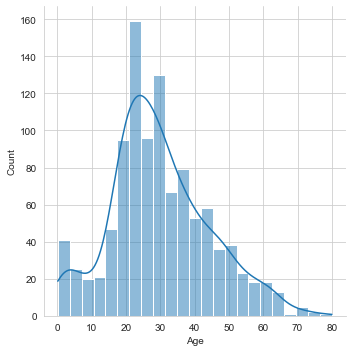

In [43]:
df_info(df_titanic, 'Age', False)

In [44]:
df2['Age'] = df_titanic['Age']
df2

,Survived,Sex,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_C,Embarked_Q,Embarked_S,Age
0,0.0,0,0,0,1,0,0,1,0,0,0,0,1,22.0
1,1.0,1,1,0,0,0,0,0,1,0,1,0,0,38.0
2,1.0,1,0,0,1,0,1,0,0,0,0,0,1,26.0
3,1.0,1,1,0,0,0,0,0,1,0,0,0,1,35.0
4,0.0,0,0,0,1,0,0,1,0,0,0,0,1,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0,0,0,1,0,0,1,0,0,0,0,1,NaN
1305,NaN,1,1,0,0,0,0,0,0,1,1,0,0,39.0
1306,NaN,0,0,0,1,0,0,1,0,0,0,0,1,38.5
1307,NaN,0,0,0,1,0,0,1,0,0,0,0,1,NaN


## Encontrando melhor correlação para preencher valores vazios para idade


In [45]:
df_titanic.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,-0.013406,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.124617,-0.408106,0.060832,0.018322,-0.558629
Sex,-0.013406,0.543351,-0.124617,1.000000,-0.063645,0.109609,0.213125,0.185523
Age,0.028814,-0.077221,-0.408106,-0.063645,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,0.109609,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,0.213125,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.185523,0.178740,0.160238,0.221539,1.000000


In [46]:
#PCLASS POSSUI MAIOR MODULO DE CORRELAÇÃO PARA IDADE, IREMOS PREENCHER OS VAZIOS BASEADOS 

## Encontrando media de idades baseados na classe e no titulo

In [47]:
df2.loc[(df2['Pclass_1'] == 1) & (df2['Title_Master'] == 1)]['Age']

305      0.92
445      4.00
802     11.00
955     13.00
1087     6.00
Name: Age, dtype: float64

In [48]:
pclass1_master_mean_age = df2.loc[(df2['Pclass_1'] == 1) & (df2['Title_Master'] == 1)]['Age'].mean()

In [49]:
pclass1_master_mean_age

6.984

In [50]:
pclass_1_miss_mean_age = df2.loc[(df2['Pclass_1'] == 1) & (df2['Title_Miss'] == 1)]['Age'].mean() 

In [51]:
pclass_1_miss_mean_age

30.338983050847457

In [52]:
pclass_1_mr_mean_age = df2.loc[(df2['Pclass_1'] == 1) & (df2['Title_Mr'] == 1)]['Age'].mean()


In [53]:
pclass_1_mr_mean_age

41.45075757575758

In [54]:
pclass_1_person_mean_age = df2.loc[(df2['Pclass_1'] == 1) & (df2['Title_Person'] == 1)]['Age'].mean()


In [55]:
pclass_1_person_mean_age

44.285714285714285

In [56]:
pclass2_master_mean_age = df2.loc[(df2['Pclass_2'] == 1) & (df2['Title_Master'] == 1)]['Age'].mean()

In [57]:
pclass2_master_mean_age

2.7572727272727273

In [58]:
pclass2_miss_mean_age = df2.loc[(df2['Pclass_2'] == 1) & (df2['Title_Miss'] == 1)]['Age'].mean()

In [59]:
pclass2_miss_mean_age

20.71708333333333

In [60]:
pclass2_mr_mean_age = df2.loc[(df2['Pclass_2'] == 1) & (df2['Title_Mr'] == 1)]['Age'].mean()

In [61]:
pclass2_mr_mean_age

32.346715328467155

In [62]:
pclass2_mrs_mean_age = df2.loc[(df2['Pclass_2'] == 1)& (df2['Title_Mrs'] == 1)]['Age'].mean()

In [63]:
pclass2_mrs_mean_age 

33.51851851851852

In [64]:
pclass2_person_mean_age = df2.loc[(df2['Pclass_2'] == 1) & (df2['Title_Person'] == 1)]['Age'].mean()

In [65]:
pclass2_person_mean_age

39.54545454545455

In [66]:
pclass3_master_mean_age = df2.loc[(df2['Pclass_3'] == 1) & (df2['Title_Master'] == 1)]['Age'].mean()

In [67]:
pclass3_master_mean_age

6.090000000000001

In [68]:
pclass3_mr_mean_age = df2.loc[(df2['Pclass_3'] == 1) & (df2['Title_Mr'] == 1)]['Age'].mean()

In [69]:
pclass3_mr_mean_age

28.318910256410255

In [70]:
pclass3_mrs_mean_age = df2.loc[(df2['Pclass_3'] == 1) & (df2['Title_Mrs'] == 1)]['Age'].mean()

In [71]:
pclass3_mrs_mean_age

32.326530612244895

In [72]:
df2.loc[(df2['Pclass_3'] == 1) & (df2['Title_Person'] == 1)]

,Survived,Sex,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_C,Embarked_Q,Embarked_S,Age
979,NaN,1,0,0,1,0,0,0,0,1,0,1,0,NaN


In [73]:
pclass3_person_mean_age = df2.loc[(df2['Pclass_3'] == 1) & (df2['Title_Person'] == 1)]['Age'].mean()

In [74]:
pclass3_person_mean_age

nan

In [75]:
pclass3_mean = df2.loc[(df2['Pclass_3'] == 1)]['Age'].mean()
pclass3_mean

24.81636726546906

In [76]:
df2.loc[(df2['Pclass_1'] == 1) & (df2['Title_Mr'] == 1)]['Age'].isnull().sum()

27

In [77]:
pclasses = ['Pclass_1, Pclass_2, Pclass_3']
titles = ['Title_Master', 'Title_Mr', 'Title_Mrs', 'Title_Miss', 'Title_Person']
df2.loc[2, 'Age']

26.0

In [78]:
for i in df2.index:
    
    if pd.isnull(df2['Age'][i]):
#         for classe, titulo in [(classe,titulo) for classe in pclasses and titulo in titles]:
        classe = df.loc[i, 'Pclass']
        titulo = df.loc[i, 'Title']
        mean_age = round(df2.loc[(df2[f'Pclass_{classe}'] == 1) & (df2[f'Title_{titulo}'] == 1)]['Age'].mean(), 0)
        mean_age_pclass = round(df2.loc[df2[f'Pclass_{classe}'] == 1]['Age'].mean(),0)
        if np.isnan(mean_age) == False:
            df2.loc[i, 'Age'] = mean_age
        else:
            df2.loc[i, 'Age'] = mean_age_pclass
df2['Age'].isnull().sum()



0

## Encontrando média de idade por Title

In [79]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,Person
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S,Mr


In [80]:
df2

,Survived,Sex,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_C,Embarked_Q,Embarked_S,Age
0,0.0,0,0,0,1,0,0,1,0,0,0,0,1,22.0
1,1.0,1,1,0,0,0,0,0,1,0,1,0,0,38.0
2,1.0,1,0,0,1,0,1,0,0,0,0,0,1,26.0
3,1.0,1,1,0,0,0,0,0,1,0,0,0,1,35.0
4,0.0,0,0,0,1,0,0,1,0,0,0,0,1,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0,0,0,1,0,0,1,0,0,0,0,1,28.0
1305,NaN,1,1,0,0,0,0,0,0,1,1,0,0,39.0
1306,NaN,0,0,0,1,0,0,1,0,0,0,0,1,38.5
1307,NaN,0,0,0,1,0,0,1,0,0,0,0,1,28.0


In [81]:
df2.drop(['Pclass_1', 'Title_Master', 'Embarked_C'], axis = 1, inplace = True)
df2

,Survived,Sex,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S,Age
0,0.0,0,0,1,0,1,0,0,0,1,22.0
1,1.0,1,0,0,0,0,1,0,0,0,38.0
2,1.0,1,0,1,1,0,0,0,0,1,26.0
3,1.0,1,0,0,0,0,1,0,0,1,35.0
4,0.0,0,0,1,0,1,0,0,0,1,35.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0,0,1,0,1,0,0,0,1,28.0
1305,NaN,1,0,0,0,0,0,1,0,0,39.0
1306,NaN,0,0,1,0,1,0,0,0,1,38.5
1307,NaN,0,0,1,0,1,0,0,0,1,28.0


In [82]:
df_titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs


## FamilySize
SibSp compreende a relação familiar como irmãos de sangue ou não + maridos/esposa
Parch compreende a relação familiar como pai/padrastro, mae/madrasta, filhos de sangue ou nao

Poranto a o tamanho da familia é a pessoa + sibsp + parch


In [83]:
df2['FamilySize'] = df_titanic['SibSp'] + df_titanic['Parch'] + 1
df2

,Survived,Sex,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S,Age,FamilySize
0,0.0,0,0,1,0,1,0,0,0,1,22.0,2
1,1.0,1,0,0,0,0,1,0,0,0,38.0,2
2,1.0,1,0,1,1,0,0,0,0,1,26.0,1
3,1.0,1,0,0,0,0,1,0,0,1,35.0,2
4,0.0,0,0,1,0,1,0,0,0,1,35.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0,0,1,0,1,0,0,0,1,28.0,1
1305,NaN,1,0,0,0,0,0,1,0,0,39.0,1
1306,NaN,0,0,1,0,1,0,0,0,1,38.5,1
1307,NaN,0,0,1,0,1,0,0,0,1,28.0,1


## Tratando Fare

In [84]:
df_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr


Quantidade de valores únicos na Fare: 
281

Quais são os valores únicos na Fare: 
[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28

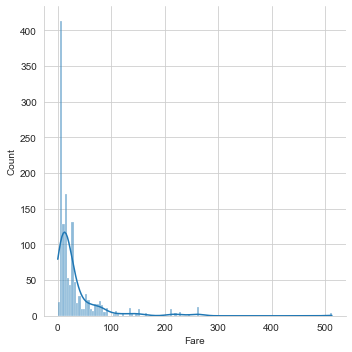

In [85]:
df_info(df_titanic, 'Fare', False)

In [86]:
df_titanic.loc[df_titanic['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1043,1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,Mr


In [87]:
fare_mean_class3 = df_titanic.loc[(df_titanic['Pclass']  == 3)]['Fare'].mean()
fare_mean_class3

13.302888700564969

In [88]:
for i in df_titanic.index:
    if pd.isna(df_titanic.loc[i, 'Fare']):
        df_titanic.loc[i, 'Fare'] = fare_mean_class3
        
df_titanic['Fare'].isnull().sum()

0

In [89]:
df2['Fare'] = df_titanic['Fare']
df2['Fare'].isnull().sum()

0

## Separando as bases

In [90]:
train = df2[:train_index].copy()
train

,Survived,Sex,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S,Age,FamilySize,Fare
0,0.0,0,0,1,0,1,0,0,0,1,22.0,2,7.2500
1,1.0,1,0,0,0,0,1,0,0,0,38.0,2,71.2833
2,1.0,1,0,1,1,0,0,0,0,1,26.0,1,7.9250
3,1.0,1,0,0,0,0,1,0,0,1,35.0,2,53.1000
4,0.0,0,0,1,0,1,0,0,0,1,35.0,1,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0,1,0,0,0,0,1,0,1,27.0,1,13.0000
887,1.0,1,0,0,1,0,0,0,0,1,19.0,1,30.0000
888,0.0,1,0,1,1,0,0,0,0,1,17.0,4,23.4500
889,1.0,0,0,0,0,1,0,0,0,0,26.0,1,30.0000


In [91]:
test = df2[test_index:].copy()
test

,Survived,Sex,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S,Age,FamilySize,Fare
891,NaN,0,0,1,0,1,0,0,1,0,34.5,1,7.8292
892,NaN,1,0,1,0,0,1,0,0,1,47.0,2,7.0000
893,NaN,0,1,0,0,1,0,0,1,0,62.0,1,9.6875
894,NaN,0,0,1,0,1,0,0,0,1,27.0,1,8.6625
895,NaN,1,0,1,0,0,1,0,0,1,22.0,3,12.2875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0,0,1,0,1,0,0,0,1,28.0,1,8.0500
1305,NaN,1,0,0,0,0,0,1,0,0,39.0,1,108.9000
1306,NaN,0,0,1,0,1,0,0,0,1,38.5,1,7.2500
1307,NaN,0,0,1,0,1,0,0,0,1,28.0,1,8.0500


In [92]:
train['Survived'] = train['Survived'].astype(int)
train

,Survived,Sex,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S,Age,FamilySize,Fare
0,0,0,0,1,0,1,0,0,0,1,22.0,2,7.2500
1,1,1,0,0,0,0,1,0,0,0,38.0,2,71.2833
2,1,1,0,1,1,0,0,0,0,1,26.0,1,7.9250
3,1,1,0,0,0,0,1,0,0,1,35.0,2,53.1000
4,0,0,0,1,0,1,0,0,0,1,35.0,1,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,0,0,0,1,0,1,27.0,1,13.0000
887,1,1,0,0,1,0,0,0,0,1,19.0,1,30.0000
888,0,1,0,1,1,0,0,0,0,1,17.0,4,23.4500
889,1,0,0,0,0,1,0,0,0,0,26.0,1,30.0000


## Definindo as variaveis X, y que irão no modelo

In [93]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [94]:
X_test = test.drop('Survived', axis = 1)

In [108]:
def acuracia_algoritmo(algoritmo, X_train, y_train, vc):
    modelo = algoritmo.fit(X_train, y_train)
    acuracia = round(modelo.score(X_train, y_train) *100, 2)
    
    train_pred = model_selection.cross_val_predict(algoritmo, X_train, y_train, cv = vc, n_jobs = -1)
    acuracia_vc = round(metrics.accuracy_score(y_train, train_pred) *100, 2)
    
    print(f"Acurácia: {acuracia}")
    print(f"Acurácia Validação Cruzada: {acuracia_vc}")
    

## Testando todos os Classificadores do SkLearn

## Random Forest

In [109]:
acuracia_algoritmo(RandomForestClassifier(), X, y, 10)


Acurácia: 98.32
Acurácia Validação Cruzada: 81.37


## Logistic Regression

In [110]:
acuracia_algoritmo(LogisticRegression(max_iter=1000), X, y, 10)

Acurácia: 82.94
Acurácia Validação Cruzada: 82.83


## Gausian Naives Bayes

In [111]:
acuracia_algoritmo(GaussianNB(), X, y, 10)

Acurácia: 78.0
Acurácia Validação Cruzada: 77.89


## Linear Support Vector Machines (SVC)

In [112]:
acuracia_algoritmo(LinearSVC(dual = False), X, y, 10)

Acurácia: 83.28
Acurácia Validação Cruzada: 82.94


## K-nearest Neighbours

In [114]:
acuracia_algoritmo(KNeighborsClassifier(), X, y, 10)

Acurácia: 81.59
Acurácia Validação Cruzada: 71.94


## Stochastic Gradient Descent

In [115]:
acuracia_algoritmo(SGDClassifier(), X, y, 10)

Acurácia: 73.18
Acurácia Validação Cruzada: 73.4


## Decision Tree Classifier

In [116]:
acuracia_algoritmo(DecisionTreeClassifier(), X, y, 10)

Acurácia: 98.32
Acurácia Validação Cruzada: 79.69


## Gradient Boost Trees


In [117]:
acuracia_algoritmo(GradientBoostingClassifier(), X, y, 10)

Acurácia: 90.24
Acurácia Validação Cruzada: 83.28


## Treinando automaticamente os melhores parametros do melhor classificador no GridSearch para encontrar a melhor perfomance

In [131]:
params = dict(     
    max_depth = [n for n in range(1, 5)],     
    min_samples_split = [n for n in range(2, 6)], 
    min_samples_leaf = [n for n in range(2, 6)],     
    n_estimators = [n for n in range(10, 50, 10)],
)

In [132]:
gbc = GradientBoostingClassifier ()

## Melhor classificador GRADIENT BOOSTING - Utilizando GrideSearch para melhorar a perfomace 

In [133]:
gbc_cv = GridSearchCV(estimator = gbc, param_grid = params, cv = 10) 


In [134]:
gbc_cv.fit(X, y)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40]})

In [135]:
print(f"Melhor pontuação: {gbc_cv.best_score_}")
print(f"Melhores parâmetros: {gbc_cv.best_estimator_}")

Melhor pontuação: 0.8440324594257179
Melhores parâmetros: GradientBoostingClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=5,
                           n_estimators=30)


In [136]:
gradientBoostingClassifier_pred = gbc_cv.predict(X_test)


In [138]:
kaggle = pd.DataFrame({'PassengerId': passengerID, 'Survived': gradientBoostingClassifier_pred})


In [139]:
kaggle


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [140]:
kaggle.to_csv('./titanic_gradient_boosting_pred.csv', index=False)